In [360]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

import sklearn 
import urllib
df=pd.read_csv('USvideos.csv',error_bad_lines=False)
df.columns

b'Skipping line 2401: expected 11 fields, saw 21\nSkipping line 2800: expected 11 fields, saw 21\nSkipping line 5297: expected 11 fields, saw 12\nSkipping line 5299: expected 11 fields, saw 12\nSkipping line 5300: expected 11 fields, saw 12\nSkipping line 5301: expected 11 fields, saw 12\n'


Index(['video_id', 'title', 'channel_title', 'category_id', 'tags', 'views',
       'likes', 'dislikes', 'comment_total', 'thumbnail_link', 'date'],
      dtype='object')

In [361]:
#Size of the data set
df.shape

(7992, 11)

In [362]:
df

video_id                                              title  \
0     XpVt6Z1Gjjo  1 YEAR OF VLOGGING -- HOW LOGAN PAUL CHANGED Y...   
1     K4wEI5zhHB0            iPhone X — Introducing iPhone X — Apple   
2     cLdxuaxaQwc                                        My Response   
3     WYYvHb03Eog                          Apple iPhone X first look   
4     sjlHnJvXdQs                                  iPhone X (parody)   
...           ...                                                ...   
7987  xlu6i6lT_vk                     How Do MASSIVE Sinkholes Form?   
7988  qRoVlH1OcI4  Trump slams Clinton for defending NFL anthem p...   
7989  EoejGgUNmVU  LP - Lost On You (A Night at The McKittrick Ho...   
7990  MT1CMTI0EVw  Tré Melvin @ #YouTubeBlack FanFest Washington ...   
7991  AFxLA3RGjnc  First cosmic event seen in gravitational waves...   

                    channel_title  category_id  \
0                Logan Paul Vlogs           24   
1                           Apple           28   
2                       PewDiePie           22   
3                       The Verge           28   
4                      jacksfilms           23   
...                           ...          ...   
7987                  Life Noggin           27   
7988             Business Insider           25   
7989                           LP           10   
7990              YouTube FanFest           24   
7991  National Science Foundation           28   

                                                   tags    views   likes  \
0     logan paul vlog|logan paul|logan|paul|olympics...  4394029  320053   
1     Apple|iPhone 10|iPhone Ten|iPhone|Portrait Lig...  7860119  185853   
2                                                [none]  5845909  576597   
3     apple iphone x hands on|Apple iPhone X|iPhone ...  2642103   24975   
4     jacksfilms|parody|parodies|iphone|iphone x|iph...  1168130   96666   
...                                                 ...      ...     ...   
7987  sinkhole|how do sinkholes form|sinkhole in wat...   440393   14362   
7988  Business Insider|Donald Trump|Hillary Clinton|...    55762    1265   
7989  LP|Death Valley|Other People|Lost On You|The M...   142908    7088   
7990  YouTube FanFest|#YTFF|Washington DC|USA|YTFF|#...    24532    2148   
7991  LIGO|Virgo|collaboration|space|science|nationa...   144039    1574   

      dislikes  comment_total                                  thumbnail_link  \
0         5931          46245  https://i.ytimg.com/vi/XpVt6Z1Gjjo/default.jpg   
1        26679              0  https://i.ytimg.com/vi/K4wEI5zhHB0/default.jpg   
2        39774         170708  https://i.ytimg.com/vi/cLdxuaxaQwc/default.jpg   
3         4542          12829  https://i.ytimg.com/vi/WYYvHb03Eog/default.jpg   
4          568           6666  https://i.ytimg.com/vi/sjlHnJvXdQs/default.jpg   
...        ...            ...                                             ...   
7987       390           1575  https://i.ytimg.com/vi/xlu6i6lT_vk/default.jpg   
7988       760           1873  https://i.ytimg.com/vi/qRoVlH1OcI4/default.jpg   
7989        68            437  https://i.ytimg.com/vi/EoejGgUNmVU/default.jpg   
7990        77              0  https://i.ytimg.com/vi/MT1CMTI0EVw/default.jpg   
7991        59              0  https://i.ytimg.com/vi/AFxLA3RGjnc/default.jpg   

       date  
0     13.09  
1     13.09  
2     13.09  
3     13.09  
4     13.09  
...     ...  
7987  22.10  
7988  22.10  
7989  22.10  
7990  22.10  
7991  22.10  

[7992 rows x 11 columns]

In [363]:
#To check if there is a null
df.isnull().sum().sum()


0

In [364]:
print(df.head())

      video_id                                              title  \
0  XpVt6Z1Gjjo  1 YEAR OF VLOGGING -- HOW LOGAN PAUL CHANGED Y...   
1  K4wEI5zhHB0            iPhone X — Introducing iPhone X — Apple   
2  cLdxuaxaQwc                                        My Response   
3  WYYvHb03Eog                          Apple iPhone X first look   
4  sjlHnJvXdQs                                  iPhone X (parody)   

      channel_title  category_id  \
0  Logan Paul Vlogs           24   
1             Apple           28   
2         PewDiePie           22   
3         The Verge           28   
4        jacksfilms           23   

                                                tags    views   likes  \
0  logan paul vlog|logan paul|logan|paul|olympics...  4394029  320053   
1  Apple|iPhone 10|iPhone Ten|iPhone|Portrait Lig...  7860119  185853   
2                                             [none]  5845909  576597   
3  apple iphone x hands on|Apple iPhone X|iPhone ...  2642103   24975   
4  

In [365]:
print(df['views'].tolist())

[4394029, 7860119, 5845909, 2642103, 1168130, 1311445, 666169, 1728614, 1338533, 1056891, 859289, 452477, 258781, 274358, 473691, 514972, 282858, 1582683, 479951, 2693468, 815608, 382525, 703750, 255967, 96872, 743947, 10535242, 483360, 3298456, 321297, 752844, 602127, 136643, 244433, 917643, 796896, 2932, 224532, 246389, 165647, 162818, 163656, 220661, 142039, 807779, 1936893, 279903, 262875, 185541, 27794, 315347, 46622, 668027, 1026622, 1862110, 148998, 182676, 379817, 103807, 44621, 48688, 141532, 7740, 16059, 4618045, 4661584, 320880, 94123, 134994, 135280, 229235, 14577, 14706, 543283, 39338, 62884, 196016, 2526119, 43199, 1157495, 42734, 16653, 416462, 470206, 2604761, 332176, 7189818, 330895, 230701, 358661, 101248, 498183, 1462030, 4774911, 2433292, 295156, 165849, 322896, 1617247, 185928, 265833, 28038, 91229, 188162, 157437, 329459, 1153128, 1769252, 381229, 260164, 1275489, 9025, 13892, 216040, 2036428, 50155, 659749, 1007014, 7410, 158816, 2330211, 1002, 622951, 92783, 352

In [366]:
#categorizing views column
i=0
for v in df['views']:
    if v>50000000:
        df['views'][i]=3
    elif v>1000000 and v<=5000000:
        df['views'][i]=2
    elif v>500000 and v<=1000000:
        df['views'][i]=1
    else:
        df['views'][i]=0
    i+=1

<ipython-input-366-901d8fea1f7b>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['views'][i]=2
<ipython-input-366-901d8fea1f7b>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['views'][i]=0
<ipython-input-366-901d8fea1f7b>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['views'][i]=1


In [367]:
df

video_id                                              title  \
0     XpVt6Z1Gjjo  1 YEAR OF VLOGGING -- HOW LOGAN PAUL CHANGED Y...   
1     K4wEI5zhHB0            iPhone X — Introducing iPhone X — Apple   
2     cLdxuaxaQwc                                        My Response   
3     WYYvHb03Eog                          Apple iPhone X first look   
4     sjlHnJvXdQs                                  iPhone X (parody)   
...           ...                                                ...   
7987  xlu6i6lT_vk                     How Do MASSIVE Sinkholes Form?   
7988  qRoVlH1OcI4  Trump slams Clinton for defending NFL anthem p...   
7989  EoejGgUNmVU  LP - Lost On You (A Night at The McKittrick Ho...   
7990  MT1CMTI0EVw  Tré Melvin @ #YouTubeBlack FanFest Washington ...   
7991  AFxLA3RGjnc  First cosmic event seen in gravitational waves...   

                    channel_title  category_id  \
0                Logan Paul Vlogs           24   
1                           Apple           28   
2                       PewDiePie           22   
3                       The Verge           28   
4                      jacksfilms           23   
...                           ...          ...   
7987                  Life Noggin           27   
7988             Business Insider           25   
7989                           LP           10   
7990              YouTube FanFest           24   
7991  National Science Foundation           28   

                                                   tags  views   likes  \
0     logan paul vlog|logan paul|logan|paul|olympics...      2  320053   
1     Apple|iPhone 10|iPhone Ten|iPhone|Portrait Lig...      0  185853   
2                                                [none]      0  576597   
3     apple iphone x hands on|Apple iPhone X|iPhone ...      2   24975   
4     jacksfilms|parody|parodies|iphone|iphone x|iph...      2   96666   
...                                                 ...    ...     ...   
7987  sinkhole|how do sinkholes form|sinkhole in wat...      0   14362   
7988  Business Insider|Donald Trump|Hillary Clinton|...      0    1265   
7989  LP|Death Valley|Other People|Lost On You|The M...      0    7088   
7990  YouTube FanFest|#YTFF|Washington DC|USA|YTFF|#...      0    2148   
7991  LIGO|Virgo|collaboration|space|science|nationa...      0    1574   

      dislikes  comment_total                                  thumbnail_link  \
0         5931          46245  https://i.ytimg.com/vi/XpVt6Z1Gjjo/default.jpg   
1        26679              0  https://i.ytimg.com/vi/K4wEI5zhHB0/default.jpg   
2        39774         170708  https://i.ytimg.com/vi/cLdxuaxaQwc/default.jpg   
3         4542          12829  https://i.ytimg.com/vi/WYYvHb03Eog/default.jpg   
4          568           6666  https://i.ytimg.com/vi/sjlHnJvXdQs/default.jpg   
...        ...            ...                                             ...   
7987       390           1575  https://i.ytimg.com/vi/xlu6i6lT_vk/default.jpg   
7988       760           1873  https://i.ytimg.com/vi/qRoVlH1OcI4/default.jpg   
7989        68            437  https://i.ytimg.com/vi/EoejGgUNmVU/default.jpg   
7990        77              0  https://i.ytimg.com/vi/MT1CMTI0EVw/default.jpg   
7991        59              0  https://i.ytimg.com/vi/AFxLA3RGjnc/default.jpg   

       date  
0     13.09  
1     13.09  
2     13.09  
3     13.09  
4     13.09  
...     ...  
7987  22.10  
7988  22.10  
7989  22.10  
7990  22.10  
7991  22.10  

[7992 rows x 11 columns]

In [368]:
df.columns

Index(['video_id', 'title', 'channel_title', 'category_id', 'tags', 'views',
       'likes', 'dislikes', 'comment_total', 'thumbnail_link', 'date'],
      dtype='object')

In [369]:
#changing non-numeric data to numeric
j=0
for t in df['tags']:
    df['tags'][j]=len(t)
    j+=1

<ipython-input-369-56931a57b8ce>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['tags'][j]=len(t)


In [370]:
#changing non-numeric data to numeric
l=0
for q in df['title']:
    df['title'][l]=len(q)
    l+=1

<ipython-input-370-6b97dc044bcb>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['title'][l]=len(q)


In [371]:
df

video_id title                channel_title  category_id tags  views  \
0     XpVt6Z1Gjjo    61             Logan Paul Vlogs           24  362      2   
1     K4wEI5zhHB0    39                        Apple           28  130      0   
2     cLdxuaxaQwc    11                    PewDiePie           22    6      0   
3     WYYvHb03Eog    25                    The Verge           28  340      2   
4     sjlHnJvXdQs    17                   jacksfilms           23   63      2   
...           ...   ...                          ...          ...  ...    ...   
7987  xlu6i6lT_vk    30                  Life Noggin           27  456      0   
7988  qRoVlH1OcI4    53             Business Insider           25   74      0   
7989  EoejGgUNmVU    50                           LP           10   66      0   
7990  MT1CMTI0EVw    55              YouTube FanFest           24  298      0   
7991  AFxLA3RGjnc    57  National Science Foundation           28  303      0   

       likes  dislikes  comment_total  \
0     320053      5931          46245   
1     185853     26679              0   
2     576597     39774         170708   
3      24975      4542          12829   
4      96666       568           6666   
...      ...       ...            ...   
7987   14362       390           1575   
7988    1265       760           1873   
7989    7088        68            437   
7990    2148        77              0   
7991    1574        59              0   

                                      thumbnail_link   date  
0     https://i.ytimg.com/vi/XpVt6Z1Gjjo/default.jpg  13.09  
1     https://i.ytimg.com/vi/K4wEI5zhHB0/default.jpg  13.09  
2     https://i.ytimg.com/vi/cLdxuaxaQwc/default.jpg  13.09  
3     https://i.ytimg.com/vi/WYYvHb03Eog/default.jpg  13.09  
4     https://i.ytimg.com/vi/sjlHnJvXdQs/default.jpg  13.09  
...                                              ...    ...  
7987  https://i.ytimg.com/vi/xlu6i6lT_vk/default.jpg  22.10  
7988  https://i.ytimg.com/vi/qRoVlH1OcI4/default.jpg  22.10  
7989  https://i.ytimg.com/vi/EoejGgUNmVU/default.jpg  22.10  
7990  https://i.ytimg.com/vi/MT1CMTI0EVw/default.jpg  22.10  
7991  https://i.ytimg.com/vi/AFxLA3RGjnc/default.jpg  22.10  

[7992 rows x 11 columns]

In [372]:
print(len(df['channel_title'][0]))

16


In [373]:
#changing non-numeric data to numeric
chann=0
for ch in df['channel_title']:
    df['channel_title'][chann]=len(ch)
    chann+=1

<ipython-input-373-7d13e47ed591>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['channel_title'][chann]=len(ch)


In [374]:
#Extract the important fea
df

video_id title channel_title  category_id tags  views   likes  \
0     XpVt6Z1Gjjo    61            16           24  362      2  320053   
1     K4wEI5zhHB0    39             5           28  130      0  185853   
2     cLdxuaxaQwc    11             9           22    6      0  576597   
3     WYYvHb03Eog    25             9           28  340      2   24975   
4     sjlHnJvXdQs    17            10           23   63      2   96666   
...           ...   ...           ...          ...  ...    ...     ...   
7987  xlu6i6lT_vk    30            11           27  456      0   14362   
7988  qRoVlH1OcI4    53            16           25   74      0    1265   
7989  EoejGgUNmVU    50             2           10   66      0    7088   
7990  MT1CMTI0EVw    55            15           24  298      0    2148   
7991  AFxLA3RGjnc    57            27           28  303      0    1574   

      dislikes  comment_total                                  thumbnail_link  \
0         5931          46245  https://i.ytimg.com/vi/XpVt6Z1Gjjo/default.jpg   
1        26679              0  https://i.ytimg.com/vi/K4wEI5zhHB0/default.jpg   
2        39774         170708  https://i.ytimg.com/vi/cLdxuaxaQwc/default.jpg   
3         4542          12829  https://i.ytimg.com/vi/WYYvHb03Eog/default.jpg   
4          568           6666  https://i.ytimg.com/vi/sjlHnJvXdQs/default.jpg   
...        ...            ...                                             ...   
7987       390           1575  https://i.ytimg.com/vi/xlu6i6lT_vk/default.jpg   
7988       760           1873  https://i.ytimg.com/vi/qRoVlH1OcI4/default.jpg   
7989        68            437  https://i.ytimg.com/vi/EoejGgUNmVU/default.jpg   
7990        77              0  https://i.ytimg.com/vi/MT1CMTI0EVw/default.jpg   
7991        59              0  https://i.ytimg.com/vi/AFxLA3RGjnc/default.jpg   

       date  
0     13.09  
1     13.09  
2     13.09  
3     13.09  
4     13.09  
...     ...  
7987  22.10  
7988  22.10  
7989  22.10  
7990  22.10  
7991  22.10  

[7992 rows x 11 columns]

In [375]:
x=df['channel_title']

In [376]:
y=df['views']

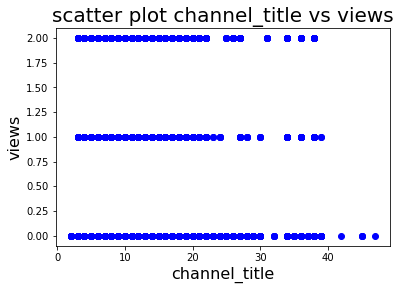

In [377]:
import numpy as np
import matplotlib.pyplot as plt

plt.scatter(x,y,c='b',marker='o')
plt.xlabel('channel_title', fontsize=16)
plt.ylabel('views', fontsize=16)
plt.title('scatter plot channel_title vs views',fontsize=20)
plt.show()


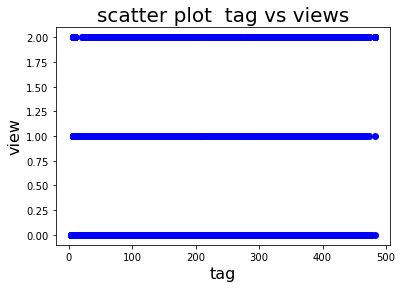

In [378]:
tagx=df['tags']

plt.scatter(tagx,y,c='b',marker='o')
plt.xlabel('tag', fontsize=16)
plt.ylabel('view', fontsize=16)
plt.title('scatter plot  tag vs views',fontsize=20)
plt.show()

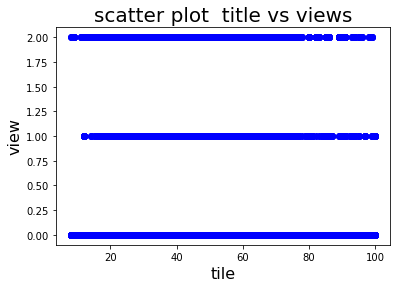

In [379]:
titlex=df['title']

plt.scatter(titlex,y,c='b',marker='o')
plt.xlabel('tile', fontsize=16)
plt.ylabel('view', fontsize=16)
plt.title('scatter plot  title vs views',fontsize=20)
plt.show()

In [380]:
#extraxt the important features
dfx=df[['channel_title','tags','title']].copy()
y=df['views']


In [381]:
dfx

channel_title tags title
0               16  362    61
1                5  130    39
2                9    6    11
3                9  340    25
4               10   63    17
...            ...  ...   ...
7987            11  456    30
7988            16   74    53
7989             2   66    50
7990            15  298    55
7991            27  303    57

[7992 rows x 3 columns]

In [382]:
x_train,x_test,y_train,y_test = train_test_split(dfx,y,random_state=0,test_size=0.2)

In [387]:
#Feature scaling
sc_x = StandardScaler()
x_train = sc_x.fit_transform(x_train)
x_test = sc_x.transform(x_test)

In [388]:
#Define  the K-NN model
classifier  = KNeighborsClassifier(n_neighbors=11,p=3,metric='euclidean')

In [389]:
classifier.fit(x_train,y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=11, p=3)

In [392]:
y_pred=classifier.predict(x_test)

In [393]:
#Evaluate the model
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[882  60  69]
 [151  51  38]
 [198  26 124]]


In [395]:
#f1 micro
print(f1_score(y_test,y_pred,average='macro'))

0.4952264097208734


In [397]:
#f1 weighted
print(f1_score(y_test,y_pred,average='weighted'))

0.6312964081150648


In [401]:
#f1 macro
print(f1_score(y_test,y_pred,average='macro'))

0.4952264097208734
